In [1]:
'''
MacOS专用字体设置
MacOS 系统中使用的中文字体路径
适用于MacOS15版本
可直接复制到代码中使用
'''
import matplotlib.pyplot as plt
from matplotlib import font_manager
# 设置字体路径
font_path = '/System/Library/Fonts/STHeiti Medium.ttc'

# 加载字体
my_font = font_manager.FontProperties(fname=font_path)

# 设置为默认字体
plt.rcParams['font.family'] = my_font.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

In [2]:
import pandas as pd

In [3]:
df = pd.read_excel('信用卡数据.xlsx')
df.head()

,编号,年龄,负债比率,月收入,贷款数量,家属人数,分类
0,1,29,0.22,7800,1,3,0
1,2,52,0.46,4650,1,0,0
2,3,28,0.10,3000,0,0,0
3,4,29,0.20,5916,0,0,0
4,5,27,1.28,1300,0,0,1


In [4]:
df.isnull().sum()

编号      0
年龄      0
负债比率    0
月收入     0
贷款数量    0
家属人数    0
分类      0
dtype: int64

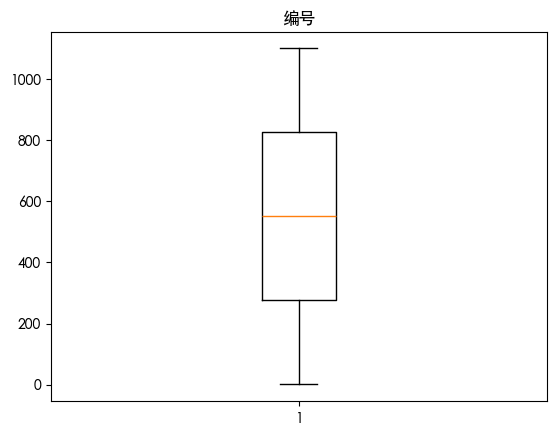

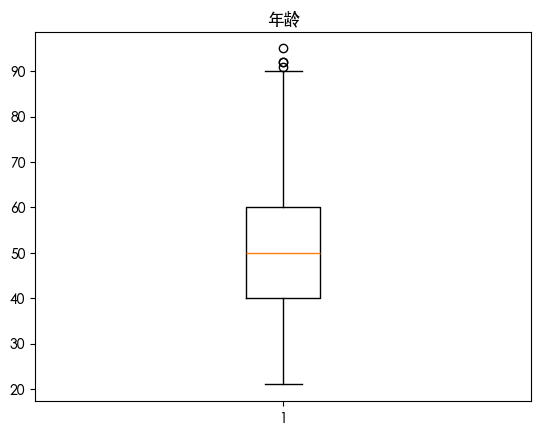

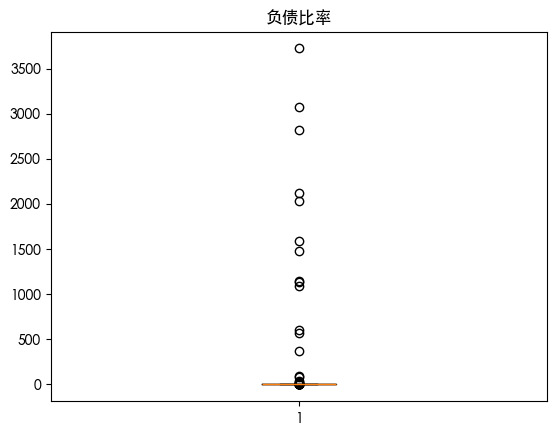

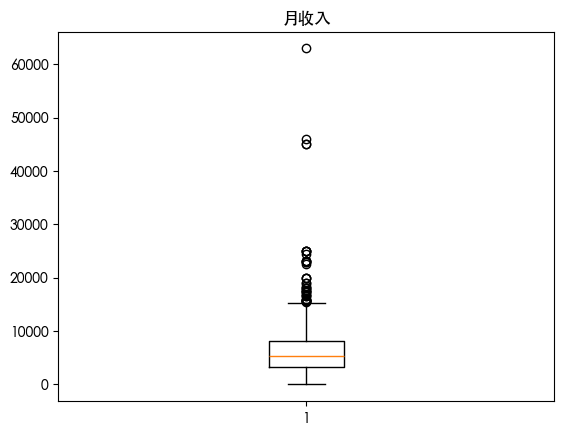

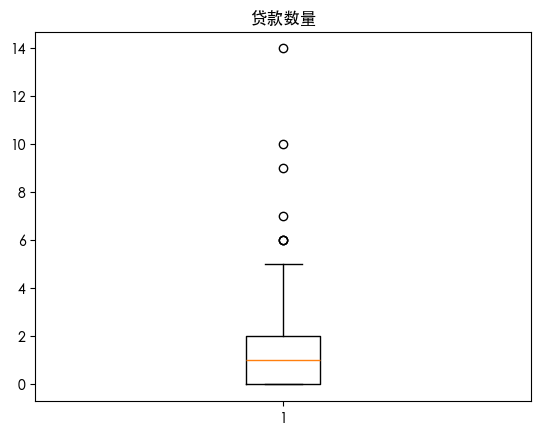

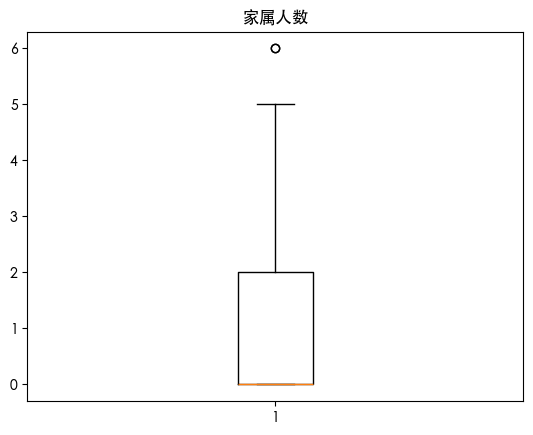

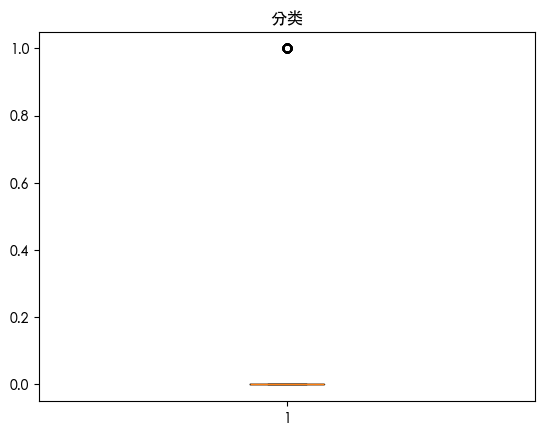

In [5]:
for col in df.columns:
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

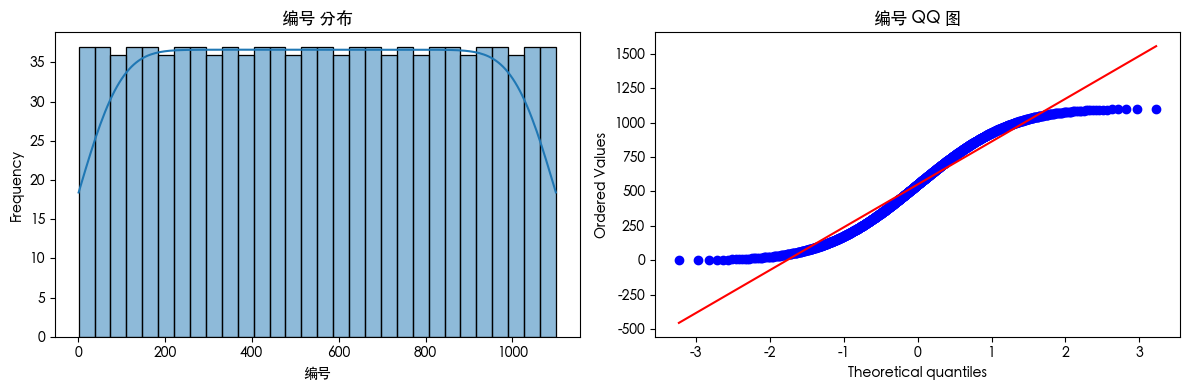

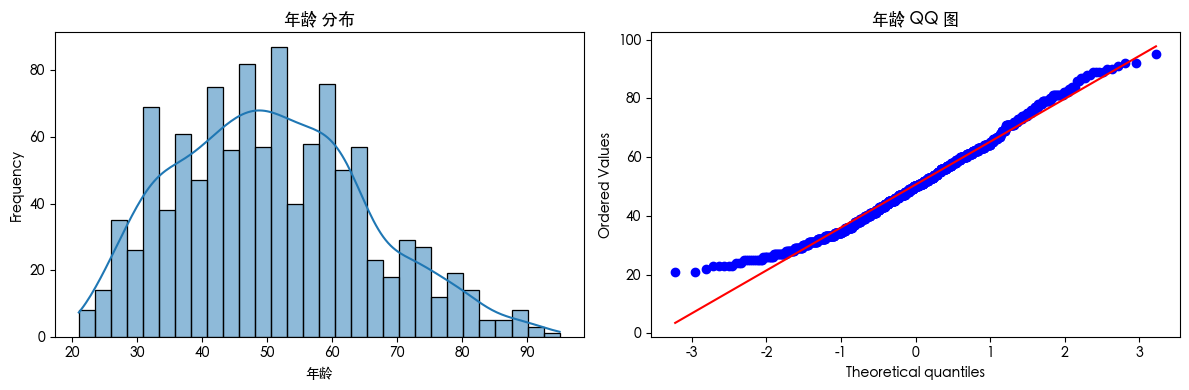

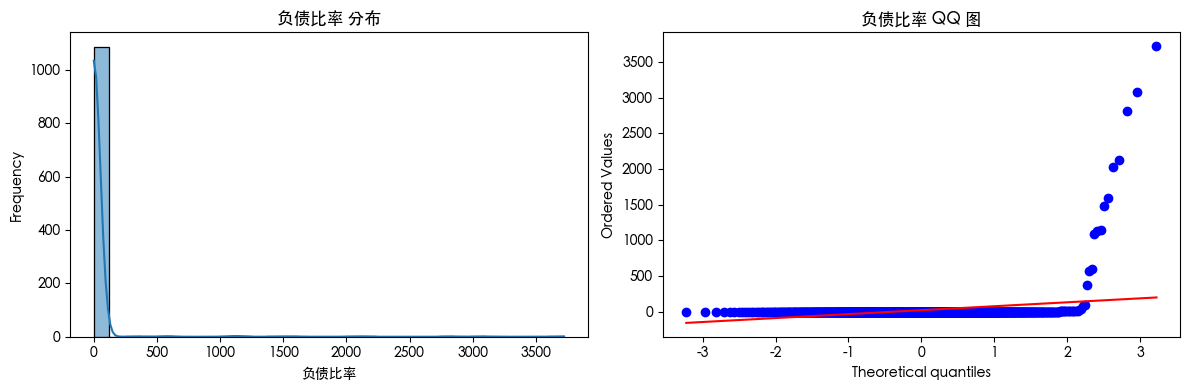

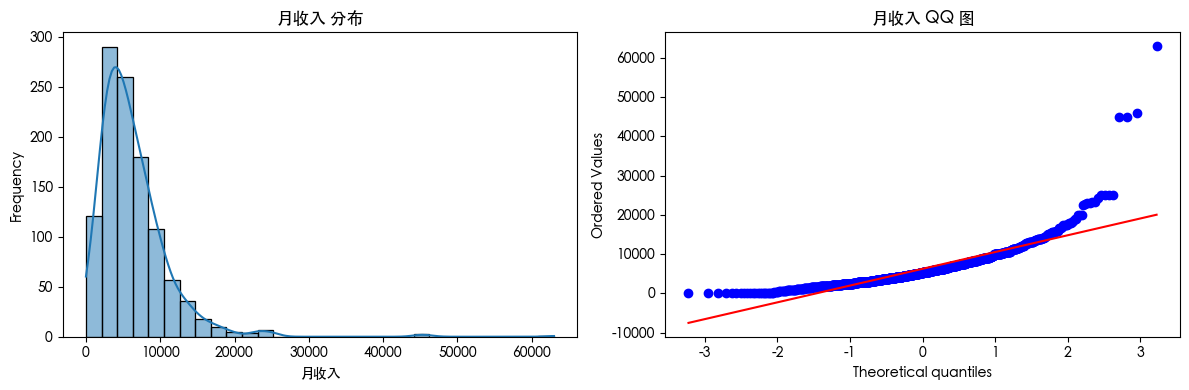

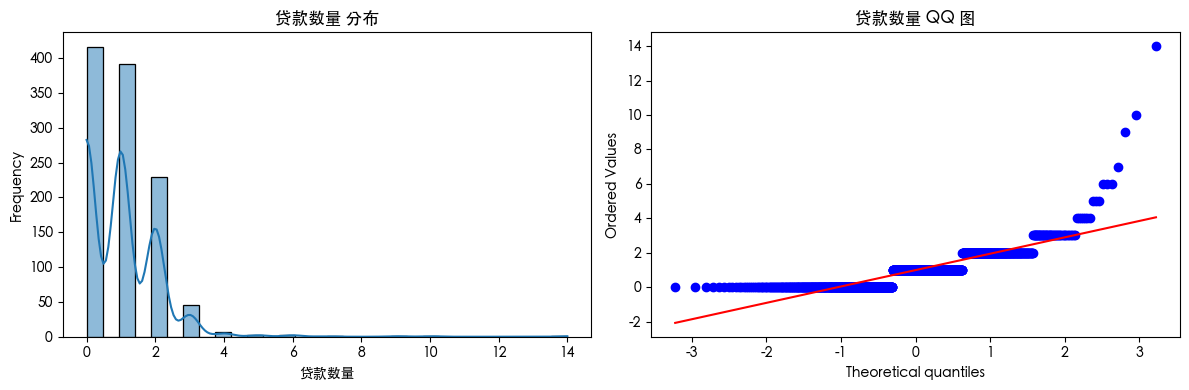

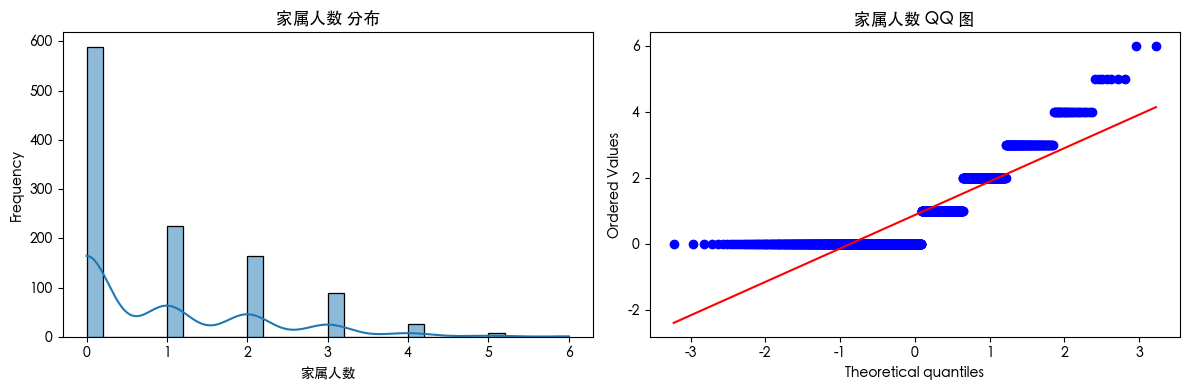

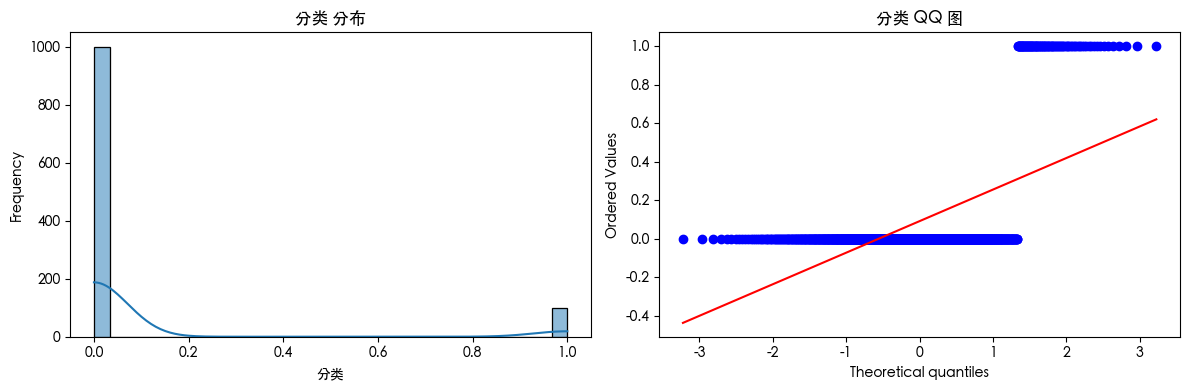

In [8]:
from scipy import stats

for col in df.columns:
    plt.figure(figsize=(12, 4))
    
    # 直方图 + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'{col} 分布')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # QQ图
    plt.subplot(1, 2, 2)
    stats.probplot(df[col].dropna(), dist="norm", plot=plt)
    plt.title(f'{col} QQ 图')
    
    plt.tight_layout()
    plt.show()

查看数据可知 数据存在异常值 查看数据分布得知 数据是长尾分布 并且目标的数据是不平衡的数据集

In [ ]:
import numpy as np
import seaborn as sns

cols = ['负债比率', '月收入', '贷款数量']
for col in cols:
    df[col+'_log'] = np.log1p(df[col])

    # 对比
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)

    plt.subplot(1, 2, 2)
    sns.histplot(df[col+'_log'], kde=True)
    plt.show()

In [ ]:
df = df.drop(columns=['负债比率', '月收入', '贷款数量'])


In [23]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['分类'])
y = df['分类']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 随机森林

In [17]:
from sklearn.ensemble import RandomForestClassifier

rm = RandomForestClassifier(random_state=42)
rm.fit(X_train, y_train)
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rm.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       200
           1       0.00      0.00      0.00        20

    accuracy                           0.91       220
   macro avg       0.45      0.50      0.48       220
weighted avg       0.83      0.91      0.87       220

[[200   0]
 [ 20   0]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# XGBoost

In [19]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       200
           1       0.25      0.05      0.08        20

    accuracy                           0.90       220
   macro avg       0.58      0.52      0.52       220
weighted avg       0.85      0.90      0.87       220

[[197   3]
 [ 19   1]]


# LightGBM

In [20]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

[LightGBM] [Info] Number of positive: 80, number of negative: 800
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000992 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 688
[LightGBM] [Info] Number of data points in the train set: 880, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.090909 -> initscore=-2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

# KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       200
           1       0.00      0.00      0.00        20

    accuracy                           0.90       220
   macro avg       0.45      0.49      0.47       220
weighted avg       0.83      0.90      0.86       220

[[197   3]
 [ 20   0]]


# SVM

In [22]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       200
           1       0.00      0.00      0.00        20

    accuracy                           0.91       220
   macro avg       0.45      0.50      0.48       220
weighted avg       0.83      0.91      0.87       220

[[200   0]
 [ 20   0]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
